/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
..

(500, 10)


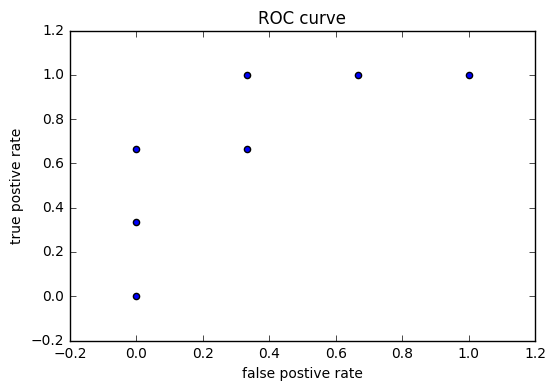

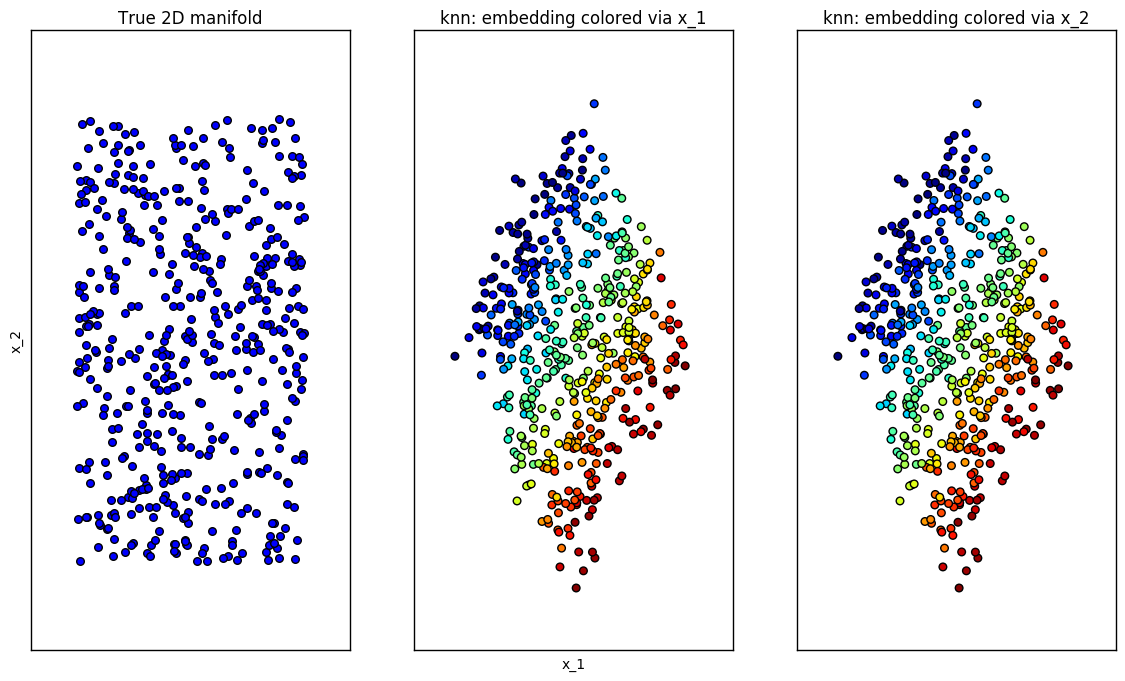

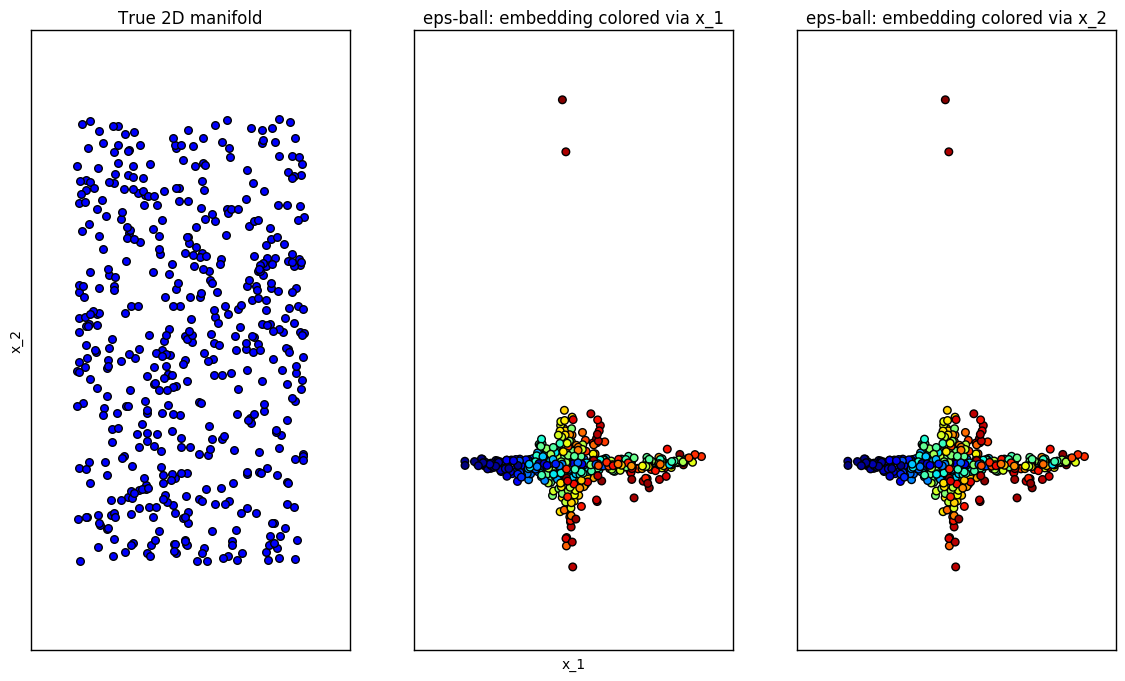

.F
FAIL: test_pca (__main__.TestSheet1)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-1-2d7da9e48dbc>", line 65, in test_pca
    npt.assert_allclose(X_denoised, correct_X_denoised, err_msg='Denoised matrix is not correct')
  File "/usr/local/lib/python3.5/dist-packages/numpy/testing/utils.py", line 1392, in assert_allclose
    verbose=verbose, header=header)
  File "/usr/local/lib/python3.5/dist-packages/numpy/testing/utils.py", line 739, in assert_array_compare
    raise AssertionError(msg)
AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0
Denoised matrix is not correct
(mismatch 100.0%)
 x: array([[-1.891507, -0.882087, -0.889935],
       [ 0.953044, -0.813424,  0.688244],
       [ 2.342211, -2.44189 ,  1.775868],...
 y: array([[-1.884066, -1.358428, -1.380879],
       [ 0.960485, -1.289765,  0.1973  ],
       [ 2.349651, -2.918231,  1.284924],...

---------------------------------------------

<unittest.runner.TextTestResult run=4 errors=0 failures=1>

In [1]:
""" sheet1_tests.py

Contains tests of the implementations:
- pca
- lle
- gammaidx

Written by
Daniel Bartz, TU Berlin, 2013
Felix Brockherde, TU Berlin, 2016
"""
import unittest

import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
%matplotlib inline

import sheet1 as imp

class TestSheet1(unittest.TestCase):
    def test_pca(self):
        X = np.array([[ -2.133268233289599,   0.903819474847349,   2.217823388231679, -0.444779660856219,
                        -0.661480010318842,  -0.163814281248453,  -0.608167714051449,  0.949391996219125],
                      [ -1.273486742804804,  -1.270450725314960,  -2.873297536940942,   1.819616794091556,
                        -2.617784834189455,   1.706200163080549,   0.196983250752276,   0.501491995499840],
                      [ -0.935406638147949,   0.298594472836292,   1.520579082270122,  -1.390457671168661,
                        -1.180253547776717,  -0.194988736923602,  -0.645052874385757,  -1.400566775105519]]).T
        m = 2;
        correct_Z = np.array([  [   -0.264248351888547, 1.29695602132309, 3.59711235194654, -2.45930603721054,
                                    1.33335186376208, -1.82020953874395, -0.85747383354342, -0.82618247564525],
                                [   2.25344911712941, -0.601279409451719, -1.28967825406348, -0.45229125158068,
                                    1.82830152899142, -1.04090644990666, 0.213476150303194, -0.911071431421484]]).T

        correct_U = np.array([  [   0.365560300980795,  -0.796515907521792,  -0.481589114714573],
                                [   -0.855143149302632,  -0.491716059542403,   0.164150878733159],
                                [  0.367553887950606,  -0.351820587590931,   0.860886992351241]] ).T

        correct_D = np.array(   [ 3.892593483673686,   1.801314737893267,   0.356275626798182 ])

        correct_X_denoised = np.array([[-1.88406616, -1.35842791, -1.38087939],
                                         [ 0.96048487, -1.28976527,  0.19729962],
                                         [ 2.34965134, -2.91823143,  1.28492391],
                                         [-0.53132686,  1.84911663, -1.23574621],
                                         [-0.96141012, -2.51555289, -0.64409954],
                                         [ 0.17114282,  1.59202918, -0.79375686],
                                         [-0.47605492,  0.15195227, -0.88121723],
                                         [ 0.43110399,  0.67815178, -0.47407698]])

        pca = imp.PCA(X)
        U, D = pca.U, pca.D
        Z = pca.project(X, m=2)
        X_denoised = pca.denoise(X, m=2)
        npt.assert_equal(Z.shape, correct_Z.shape, err_msg='Matrix Z does not have the correct shape')
        npt.assert_equal(U.shape, correct_U.shape, err_msg='Matrix U does not have the correct shape')
        npt.assert_equal(D.shape, correct_D.shape, err_msg='Matrix D does not have the correct shape')
        npt.assert_equal(X_denoised.shape, correct_X_denoised.shape, err_msg='Denoised matrix does not have the correct shape')

        if not (np.allclose(Z, -correct_Z) or np.allclose(Z, correct_Z)):
            raise AssertionError('Matrix Z is not correct')
        #if not (np.allclose(U, -correct_U) or np.allclose(U, correct_U)):
        #    raise AssertionError('Matrix U is not correct')
        npt.assert_allclose(D, correct_D, err_msg='Matrix D is not correct')
        npt.assert_allclose(X_denoised, correct_X_denoised, err_msg='Denoised matrix is not correct')

    def test_gammaidx(self):
        X = np.array([  [   0.5376671395461, -2.25884686100365, 0.318765239858981, -0.433592022305684, 3.57839693972576,
                            -1.34988694015652, 0.725404224946106, 0.714742903826096, -0.124144348216312, 1.40903448980048,
                            0.67149713360808, 0.717238651328838, 0.488893770311789, 0.726885133383238, 0.293871467096658,
                            0.888395631757642, -1.06887045816803, -2.9442841619949, 0.325190539456198, 1.37029854009523],
                        [   1.83388501459509, 0.862173320368121, -1.30768829630527, 0.34262446653865, 2.76943702988488,
                            3.03492346633185, -0.0630548731896562, -0.204966058299775, 1.48969760778546, 1.41719241342961,
                            -1.20748692268504, 1.63023528916473, 1.03469300991786, -0.303440924786016, -0.787282803758638,
                            -1.14707010696915, -0.809498694424876, 1.4383802928151, -0.754928319169703, -1.7115164188537]]).T

        k = 3;

        correct_gamma = np.array([ 0.606051220224367, 1.61505686776722, 0.480161964450438, 1.18975154873627,
                                    2.93910520141032, 2.15531724762712, 0.393996268071324, 0.30516080506303,
                                    0.787481421847747, 0.895402545799062, 0.385599174039363, 0.544395897115756,
                                    0.73397995201338, 0.314642851266896, 0.376994725474732, 0.501091387197748,
                                    1.3579045507961, 1.96372676400505, 0.389228251829715, 0.910065898315003])

        gamma = imp.gammaidx(X, k)

        npt.assert_equal(gamma.shape, correct_gamma.shape, err_msg='gamma does not have the correct shape')

        npt.assert_allclose(gamma, correct_gamma, err_msg='gamma is not correct')

    def randrot(self, d):
        '''generate random orthogonal matrix'''
        M = 100. * (np.random.rand(d, d) - 0.5)
        M = 0.5 * (M - M.T);
        R = expm(M);
        return R

    def plot(self, Xt, Xp, n_rule):
        plt.figure(figsize=(14, 8))

        plt.subplot(1, 3, 1)
        plt.scatter(Xt[:, 0], Xt[:, 1], 30)
        plt.title('True 2D manifold')
        plt.ylabel('x_2')
        plt.xticks([], [])
        plt.yticks([], [])

        plt.subplot(1, 3, 2);
        plt.scatter(Xp[:, 0], Xp[:, 1], 30, Xt[:, 1]);
        plt.title(n_rule + ': embedding colored via x_1');
        plt.xlabel('x_1')
        plt.xticks([], [])
        plt.yticks([], [])

        plt.subplot(1, 3, 3);
        plt.scatter(Xp[:, 0], Xp[:, 1], 30, Xt[:, 1]);
        plt.title(n_rule + ': embedding colored via x_2');
        plt.xticks([], [])
        plt.yticks([], [])

        plt.show()

    def test_lle(self):
        n = 500
        Xt = 10. * np.random.rand(n, 2);
        X = np.append(Xt, 0.5 * np.random.randn(n, 8), 1);

        # Rotate data randomly.
        X = np.dot(X, self.randrot(10).T);
        print(X.shape)
        with self.subTest(n_rule='knn', k=30):
            Xp = imp.lle(X, 2, n_rule='knn', k=30, tol=1e-3)
            self.plot(Xt, Xp, 'knn')
        with self.subTest(n_rule='eps-ball', epsilon=5.):
            Xp = imp.lle(X, 2, n_rule='eps-ball', epsilon=5., tol=1e-3)
            self.plot(Xt, Xp, 'eps-ball')
        with self.subTest(n_rule='eps-ball', epsilon=0.5):
            with self.assertRaises(ValueError, msg='Graph should not be connected and raise ValueError.'):
                imp.lle(X, 2, n_rule='eps-ball', epsilon=0.5, tol=1e-3)

    def test_auc(self):
        res = imp.auc(np.array([-1, -1, -1, +1, +1]), np.array([0.3, 0.4, 0.5, 0.6, 0.7]))
        npt.assert_allclose(res, 1.0, err_msg='Separable dataset should give AUC of 1.0')
        res = imp.auc(np.array([-1, -1, -1, +1, +1, +1]), np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8]), plot=True)
        npt.assert_allclose(res, 0.89, rtol=0.05, atol=5e-2, err_msg='AUC example failed.')

a = TestSheet1()
suite = unittest.TestLoader().loadTestsFromModule(a)
unittest.TextTestRunner().run(suite)


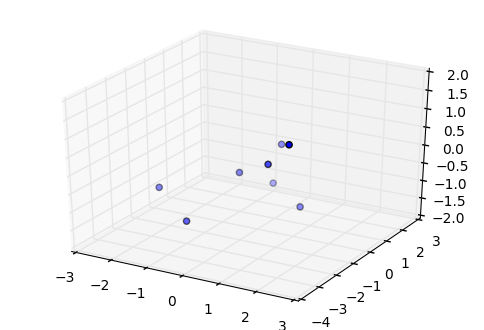

In [3]:
X = np.array([[ -2.133268233289599,   0.903819474847349,   2.217823388231679, -0.444779660856219,
                -0.661480010318842,  -0.163814281248453,  -0.608167714051449,  0.949391996219125],
              [ -1.273486742804804,  -1.270450725314960,  -2.873297536940942,   1.819616794091556,
                -2.617784834189455,   1.706200163080549,   0.196983250752276,   0.501491995499840],
              [ -0.935406638147949,   0.298594472836292,   1.520579082270122,  -1.390457671168661,
                -1.180253547776717,  -0.194988736923602,  -0.645052874385757,  -1.400566775105519]]).T
correct_X_denoised = np.array([[-1.88406616, -1.35842791, -1.38087939],
                                 [ 0.96048487, -1.28976527,  0.19729962],
                                 [ 2.34965134, -2.91823143,  1.28492391],
                                 [-0.53132686,  1.84911663, -1.23574621],
                                 [-0.96141012, -2.51555289, -0.64409954],
                                 [ 0.17114282,  1.59202918, -0.79375686],
                                 [-0.47605492,  0.15195227, -0.88121723],
                                 [ 0.43110399,  0.67815178, -0.47407698]])

correct_U = np.array([  [   0.365560300980795,  -0.796515907521792,  -0.481589114714573],
                        [   -0.855143149302632,  -0.491716059542403,   0.164150878733159],
                        [  0.367553887950606,  -0.351820587590931,   0.860886992351241]] ).T
p= imp.PCA(X)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])


In [4]:
#Assignment 5 (15 pts)
#In this assignment, you will analyze the usps dataset (available on ISIS) with PCA in the following manner:



import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
%matplotlib inline

import sheet1 as imp
from scipy.io import loadmat

#1. Load the usps data set.
data = loadmat('usps.mat') 
label = data['data_labels']
pat = data['data_patterns']






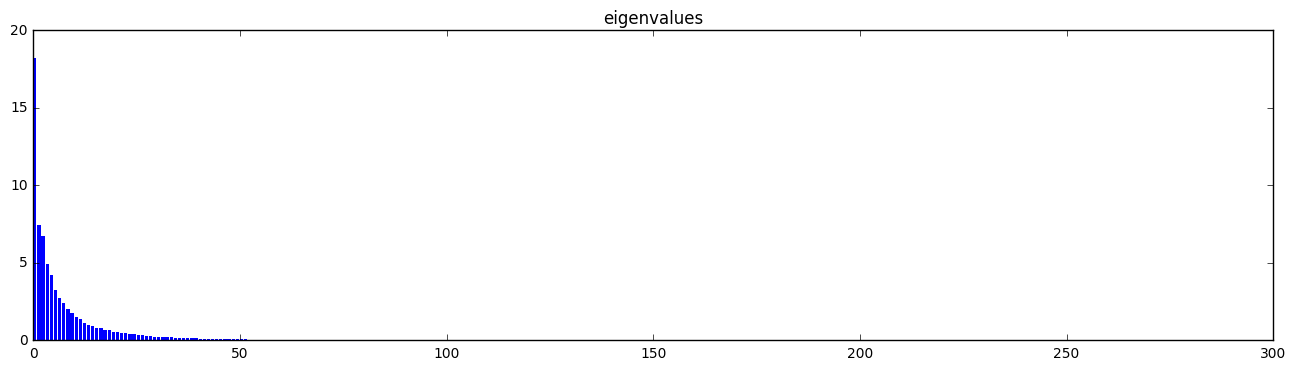

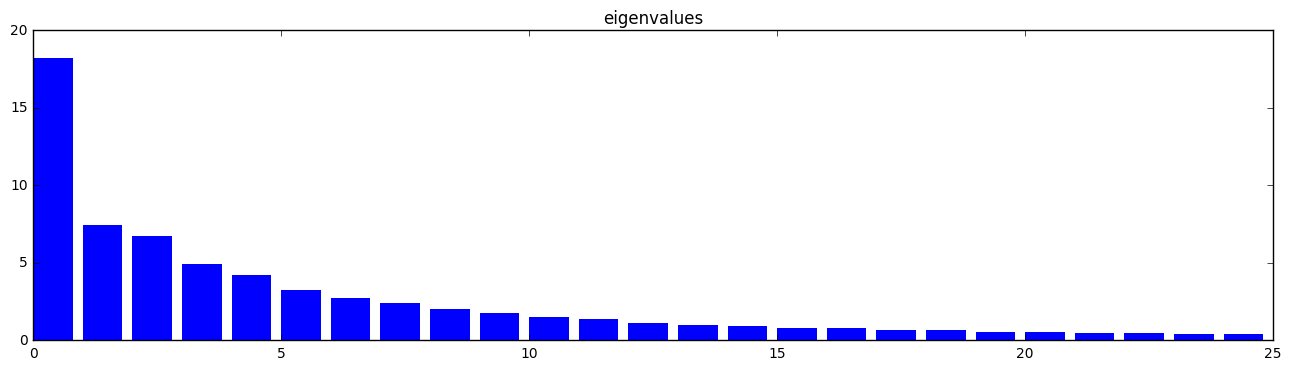

In [5]:
#2. Analysis of PCA:
pca = imp.PCA(pat.T)


#(a) Visualize all principal values,
plt.figure(0, (16,4))
cut = len(pca.D)
plt.bar(np.arange(cut), pca.D[:cut], lw=0)
plt.title("eigenvalues")
plt.show()

#(b) Visualize the largest 25 principal values 
plt.figure(0, (16,4))
cut = min(len(pca.D),25)
plt.bar(np.arange(cut), pca.D[:cut], lw=0)
plt.title("eigenvalues")
plt.show()

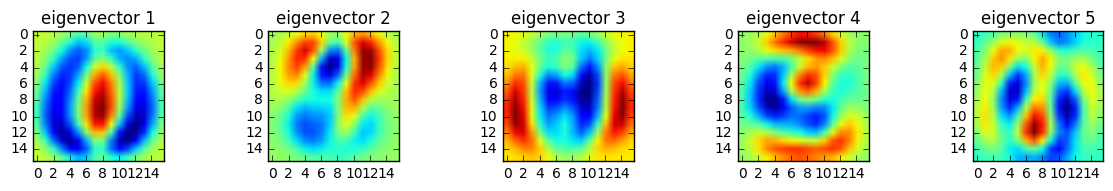

In [73]:
#(c) the first 5 principal directions (as images, see imshow).
plt.figure(figsize=(48,32))
for i in range(5):
    plt.subplot(16,16,i+1)
    plt.title("eigenvector %i" % (i+1))
    plt.imshow(pca.U.T[:,i].reshape(16,16))

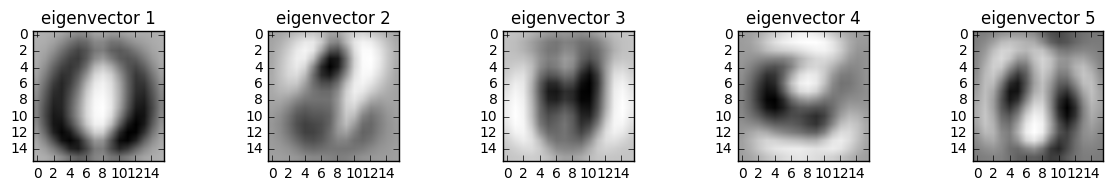

In [74]:
import matplotlib.cm as cm
plt.figure(figsize=(48,32))
for i in range(5):
    plt.subplot(16,16,i+1)
    plt.title("eigenvector %i" % (i+1))
    plt.imshow(pca.U.T[:,i].reshape(16,16),cmap = cm.Greys_r)

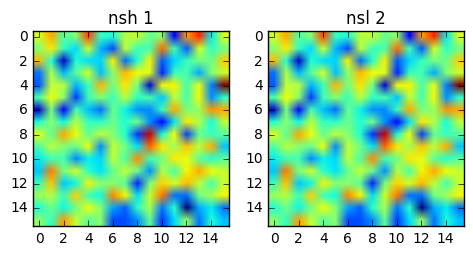

In [75]:
ns = np.random.randn(256)
sigmah = 3
sigmal = 0.3
nsh = ns*sigmah
nsl = ns*sigmal
plt.figure(figsize=(48,48))
plt.subplot(16,16,1)
plt.title("nsh %i" % 1)
plt.imshow(nsh.reshape(16,16))
plt.subplot(16,16,2)
plt.title("nsl %i" % 2)
plt.imshow(nsl.reshape(16,16))

Original


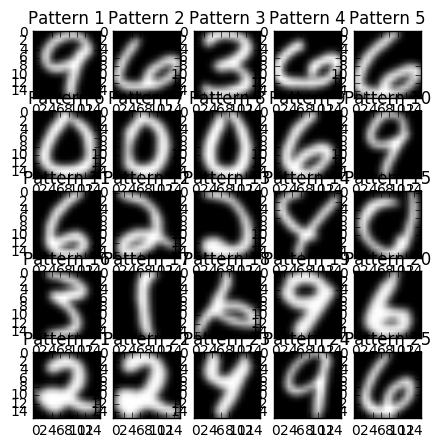

In [82]:
plt.figure(figsize=(5,5))
print("Original")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title("Pattern %i" % (i+1))
    plt.imshow(pat[:,i].reshape(16,16), cmap='gray')

Low noise


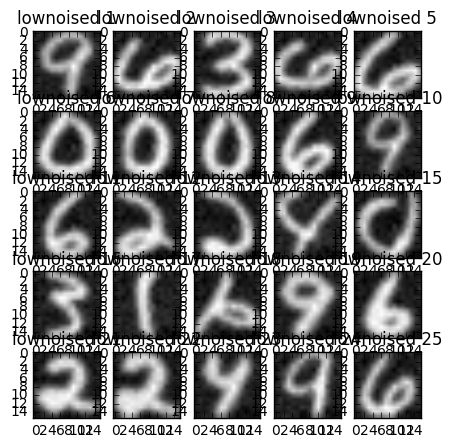

In [83]:
plt.figure(figsize=(5,5))
lownoised = pat.T + 0.1*ns
lownoised = lownoised.T
print("Low noise")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title("lownoised %i" % (i+1))
    plt.imshow((lownoised[:,i].reshape(16,16)),cmap='gray')

Strong noise


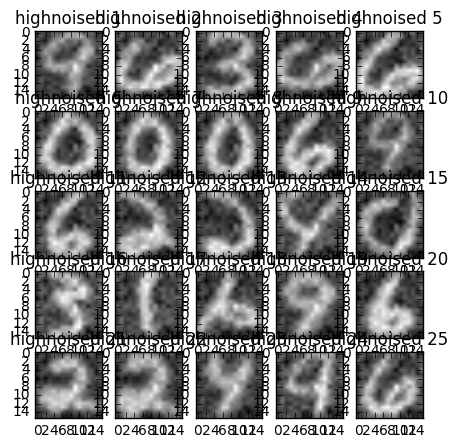

In [84]:
plt.figure(figsize=(5,5))
highnoised = pat.T + 0.3*ns
highnoised = highnoised.T
print("Strong noise")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title("highnoised %i" % (i+1))
    plt.imshow((highnoised[:,i].reshape(16,16)),cmap='gray')

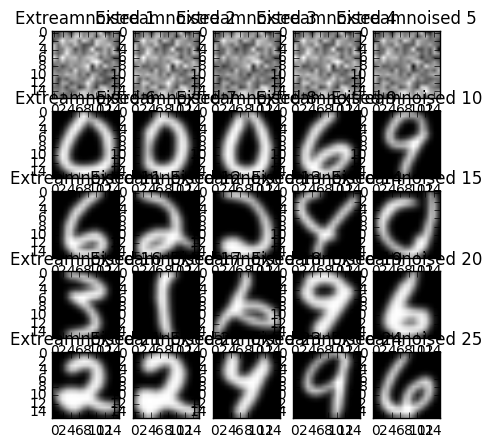

In [85]:
plt.figure(figsize=(5,5))
exnoise = np.zeros((len(pat),5))
exnoise = exnoise + (2.0*ns.reshape(len(pat),1))
extream = np.array(pat)
extream[:,0:5] =extream[:,0:5]- exnoise

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title("Extreamnoised %i" % (i+1))
    plt.imshow((extream[:,i].reshape(16,16)),cmap='gray')

In [86]:
#3. Consider three noise scenarios 
# a) Calculate the PCA of this data and redo the plots of prinicipal values.
#    Explain the differences to the original spectrum.

# PCA with lownoise
lowpca = imp.PCA(lownoised.T)
highpca = imp.PCA(highnoised.T)
expca = imp.PCA(extream.T)

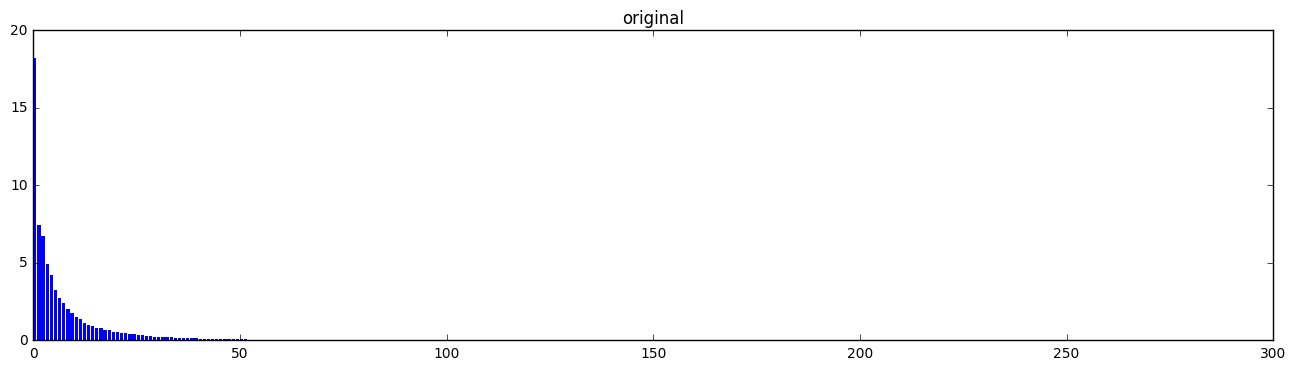

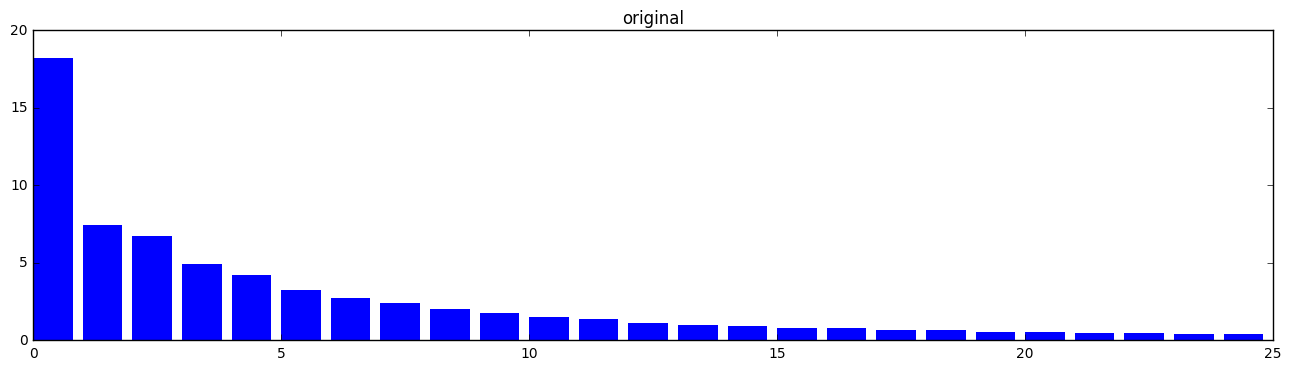

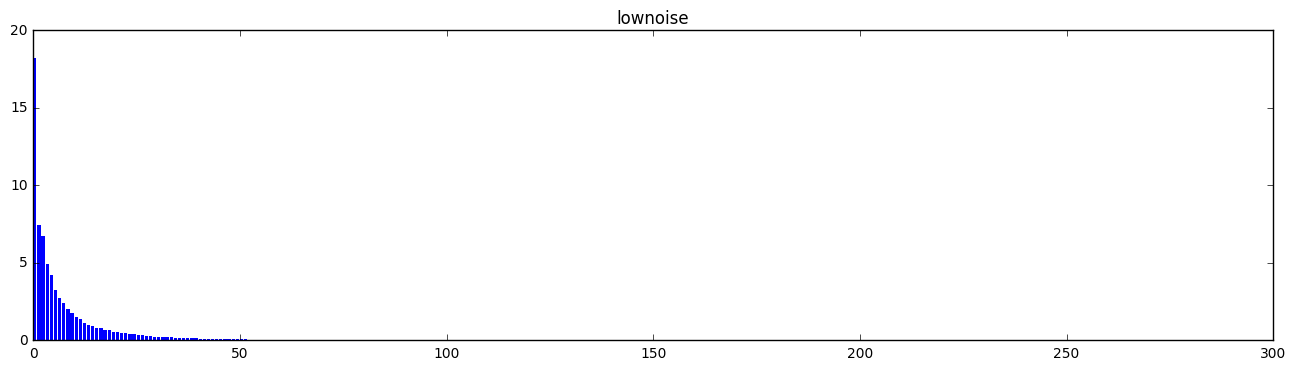

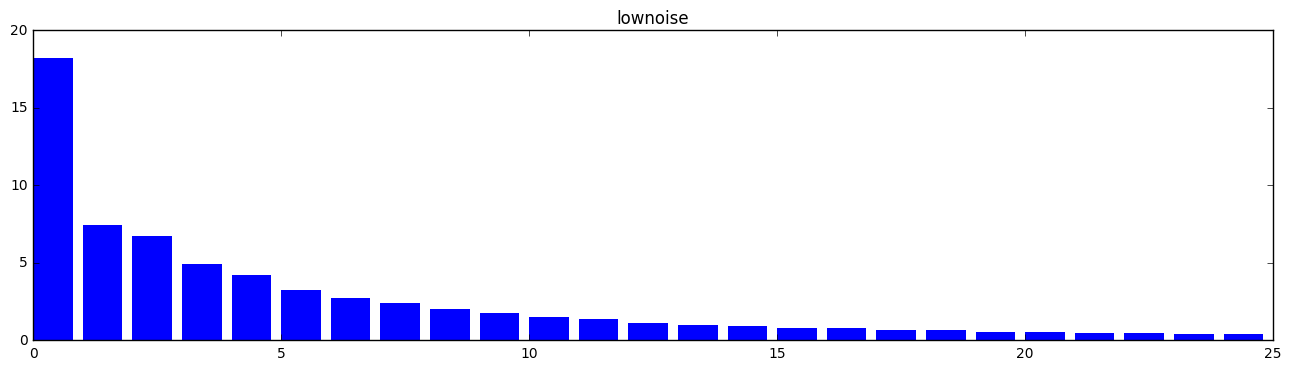

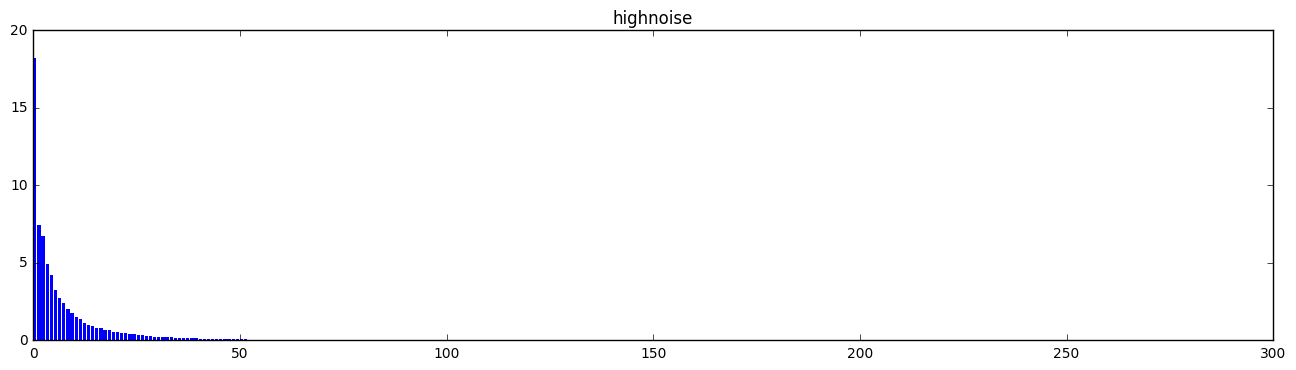

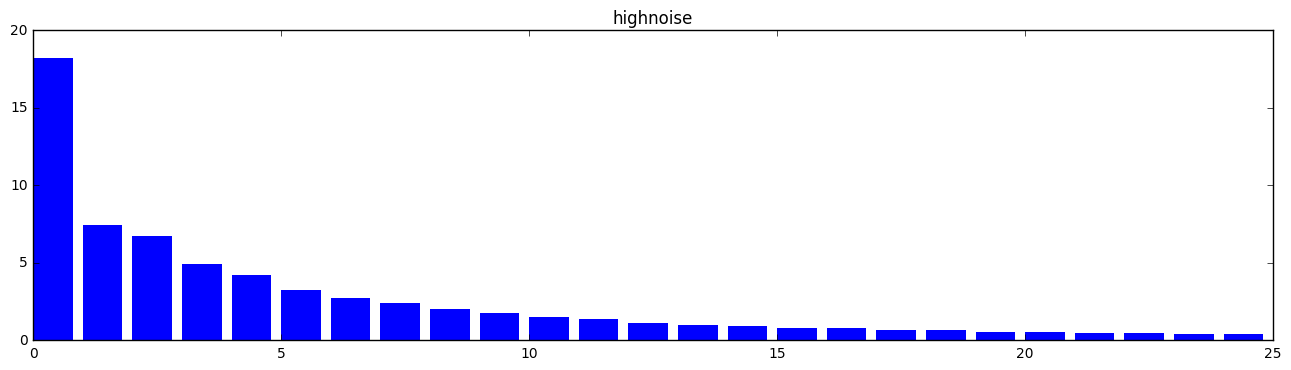

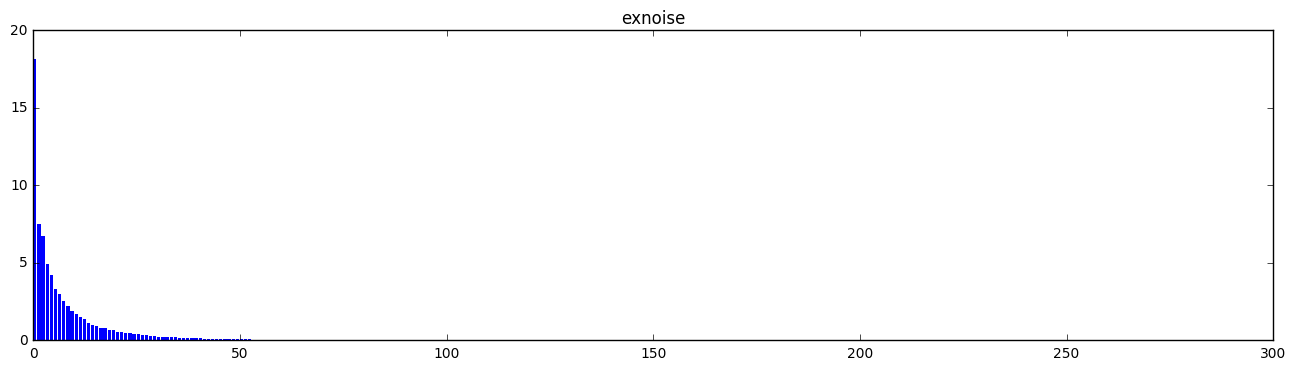

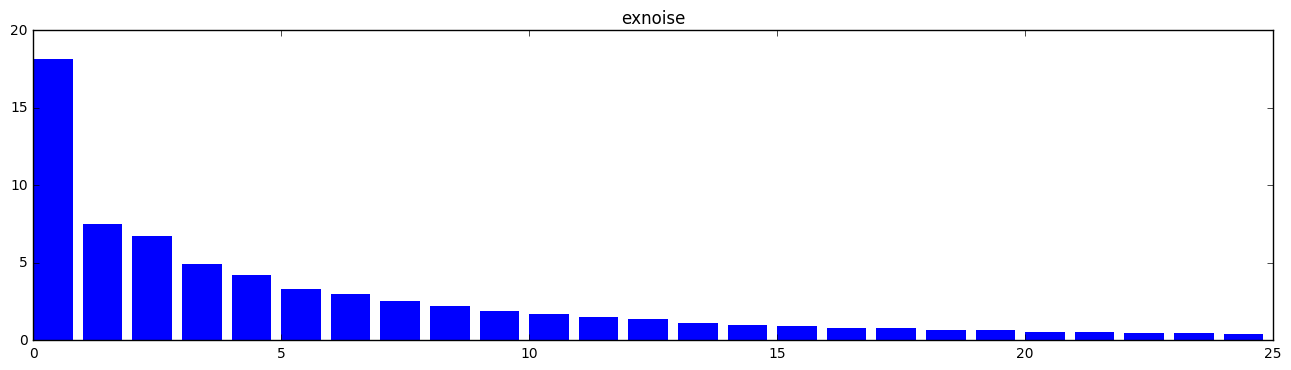

In [87]:
# original eigenvalue
plt.figure(0, (16,4))
cut = len(pca.D)
plt.bar(np.arange(cut), pca.D[:cut], lw=0)
plt.title("original")
plt.show()


plt.figure(0, (16,4))
cut = min(len(pca.D),25)
plt.bar(np.arange(cut), pca.D[:cut], lw=0)
plt.title("original")
plt.show()

# low noised version

plt.figure(0, (16,4))
cut = len(lowpca.D)
plt.bar(np.arange(cut), lowpca.D[:cut], lw=0)
plt.title("lownoise")
plt.show()


plt.figure(0, (16,4))
cut = min(len(lowpca.D),25)
plt.bar(np.arange(cut), lowpca.D[:cut], lw=0)
plt.title("lownoise")
plt.show()

# high noised version

plt.figure(0, (16,4))
cut = len(highpca.D)
plt.bar(np.arange(cut), highpca.D[:cut], lw=0)
plt.title("highnoise")
plt.show()


plt.figure(0, (16,4))
cut = min(len(highpca.D),25)
plt.bar(np.arange(cut), highpca.D[:cut], lw=0)
plt.title("highnoise")
plt.show()

# extream noised version

plt.figure(0, (16,4))
cut = len(expca.D)
plt.bar(np.arange(cut), expca.D[:cut], lw=0)
plt.title("exnoise")
plt.show()


plt.figure(0, (16,4))
cut = min(len(expca.D),25)
plt.bar(np.arange(cut),expca.D[:cut], lw=0)
plt.title("exnoise")
plt.show()



Strong noise
When m=99 minial error with 9.216597


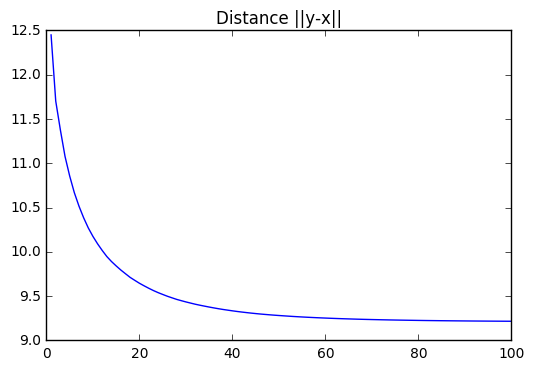

In [88]:
#b)Denoise the images by reconstruction from projections on the m largest principal components:
#  the reconstruction y of a data point x by the m largest eigenvectors v1; : : : ; vm of the covariance
#  matrix is given by
#lowpca = imp.PCA(lownoised.T)
#highpca = imp.PCA(highnoised.T)
#expca = imp.PCA(extream.T)


#lownoise
ite = 100
errmean= np.zeros(ite)
for i in range(ite):
    denol=lowpca.denoise(lownoised.T,i)
    errmean[i] =np.mean(np.linalg.norm(pat - denol.T,axis=0)) 
    
minerrqrg = np.argmin(errmean)
minerr = np.min(errmean)
print("Strong noise")
print("When m=%i" %minerrqrg + " minial error with %f"%minerr)
plt.title("Distance ||y-x||")
plt.plot(np.arange(1,101),errmean)



In [89]:
denol=lowpca.denoise(lownoised.T,minerrqrg)
denol=denol.T
print(denol.shape)

(256, 2007)


Low noise denois


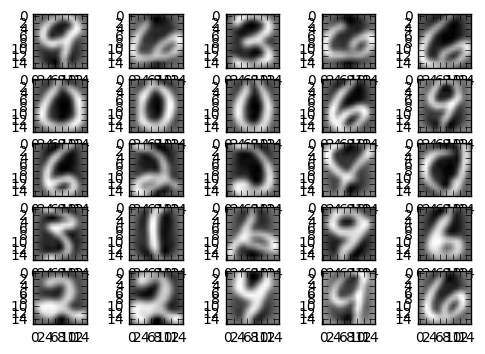

In [90]:
print("Low noise denois")

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow((denol[:,i].reshape(16,16)),cmap='gray')

Strong noise
When m=99 minial error with 9.216597


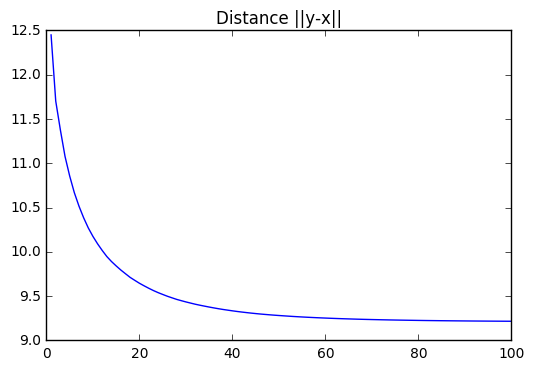

In [91]:
#highnoise
ite = 100
errmeanh= np.zeros(ite)
for i in range(ite):
    denoh=highpca.denoise(highnoised.T,i)
    errmeanh[i] =np.mean(np.linalg.norm(pat - denoh.T,axis=0)) 
    
minerrqrgh = np.argmin(errmeanh)
minerrh = np.min(errmeanh)
print("Strong noise")
print("When m=%i" %minerrqrgh + " minial error with %f"%minerrh)
plt.title("Distance ||y-x||")
plt.plot(np.arange(1,101),errmeanh)

In [92]:
denoh=highpca.denoise(highnoised.T,minerrqrg)
denoh = denoh.T

High noise denois


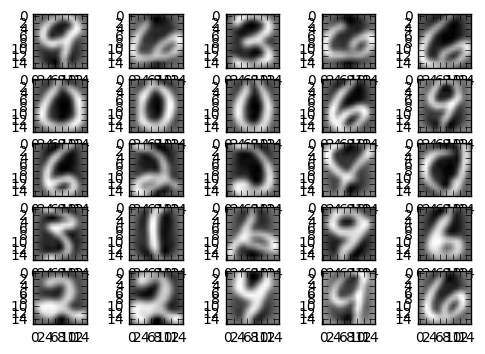

In [93]:
print("High noise denois")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow((denoh[:,i].reshape(16,16)),cmap='gray')

Extream noise
When m=99 minial error with 9.277655


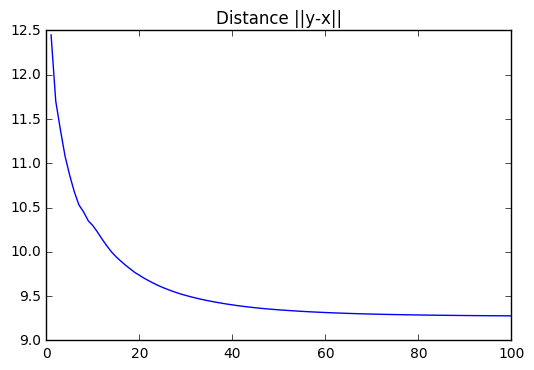

In [94]:
#exnoise
ite = 100
errmeanex= np.zeros(ite)
for i in range(ite):
    denoex=expca.denoise(extream.T,i)
    errmeanex[i] =np.mean(np.linalg.norm(pat - denoex.T,axis=0)) 
    
minerrqrgex = np.argmin(errmeanex)
minerrex = np.min(errmeanex)
print("Extream noise")
print("When m=%i" %minerrqrgex + " minial error with %f"%minerrex)
plt.title("Distance ||y-x||")
plt.plot(np.arange(1,101),errmeanex)

In [95]:
denoex=expca.denoise(extream.T,minerrqrgex)
denoex = denoex.T

Extream noise denois


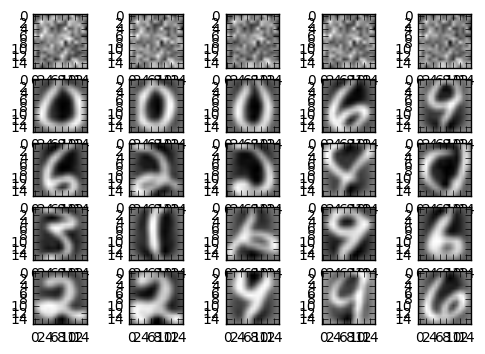

In [96]:
print("Extream noise denois")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow((denoex[:,i].reshape(16,16)),cmap='gray')

Low noise 10 examples comparing to original and denoised


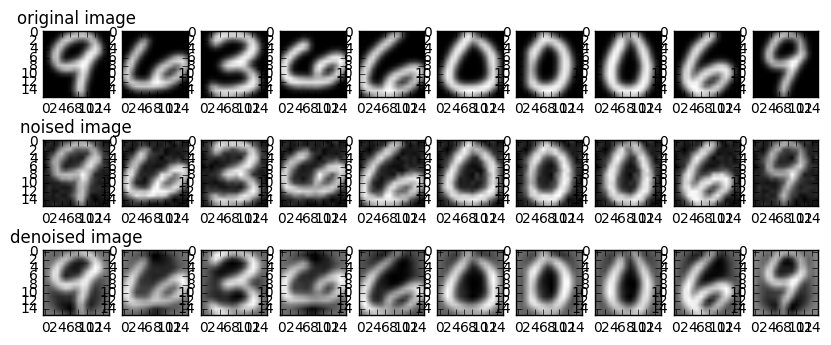

In [97]:
# c)
print("Low noise 10 examples comparing to original and denoised")
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(3,10,i+1)
    if(i==0):
        plt.title("original image" )
    plt.imshow((pat[:,i].reshape(16,16)),cmap='gray')
    plt.subplot(3,10,i+11)
    if(i==0):
        plt.title("noised image" )
    plt.imshow((lownoised[:,i].reshape(16,16)),cmap='gray')
    plt.subplot(3,10,i+21)
    if(i==0):
        plt.title("denoised image" )
    plt.imshow((denol[:,i].reshape(16,16)),cmap='gray')

In [2]:
#Assignment 6

import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
%matplotlib inline

import sheet1 as imp
from scipy.io import loadmat

banana = np.load('banana.npz')
data = banana['data']
labels = banana['label']

posarg = np.where(labels[0] == 1)
negarg = np.where(labels[0] == -1)

inlines = np.array(data[:,posarg[0]])
negclass = np.array(data[:,negarg[0]])

ite =100
p = np.array([0.01, 0.05, 0.1, 0.25])
N = len(data[0])
NN = len(negclass[0])
NP = len(posarg[0])
n = NP*p/(1-p)

In [3]:
choice = np.random.choice(NN,int(n[0]))
print(int(n[0]))

24


In [4]:
negchoiced = negclass[:,choice]
newset = np.append(inlines, negchoiced,axis=1)
newlabel = np.append(np.ones((NP)), -np.ones(int(n[0])),axis=0)
print(newset.shape)
print(newlabel.shape)

(2, 2400)
(2400,)


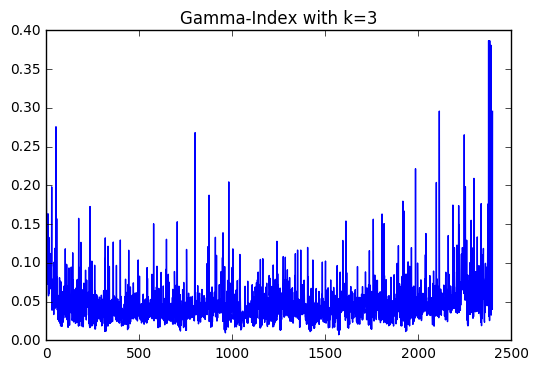

In [5]:
gamma = imp.gammaidx(newset.T, 3)
plt.title("Gamma-Index with k=3")
plt.plot(gamma)

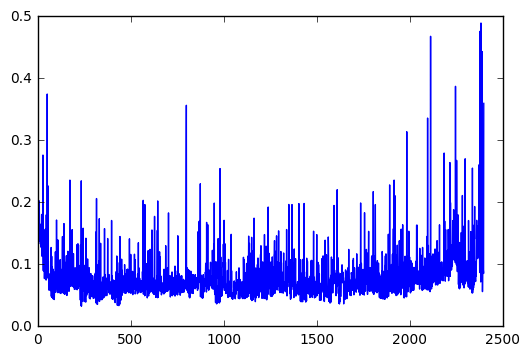

In [6]:
gamma = imp.gammaidx(newset.T, 10)
plt.plot(gamma)

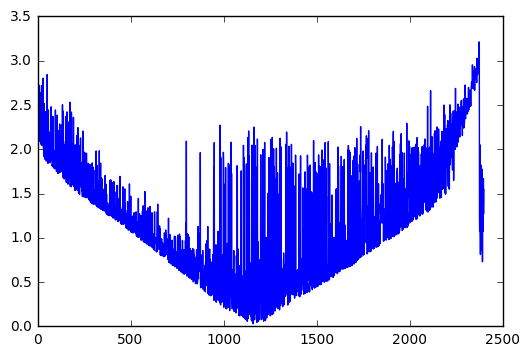

In [7]:
mpoint = np.mean(newset,axis=1)
D = np.linalg.norm(newset-mpoint.reshape(2,1),axis=0)
plt.plot(D)

In [8]:
D[np.where(D==0)] = np.min(D)
invD = 1/D
invD.shape

(2400,)

In [142]:
newlabel.shape

(2400,)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.57928240740740733

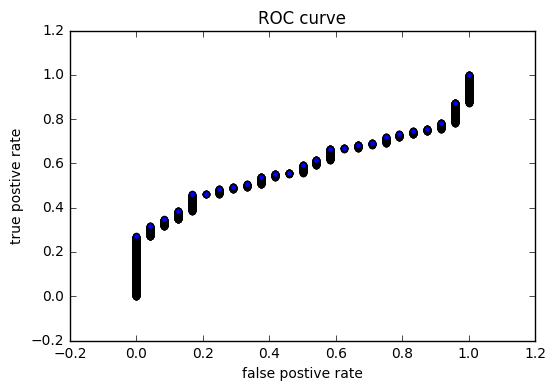

In [9]:
imp.auc(newlabel, invD, plot=True)

In [148]:
print(np.array([-1, -1, -1, +1, +1, +1]).shape, np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8]).shape)

(6,) (6,)


In [154]:
def auc(y_true, y_val, plot=False):
    d = len(y_true)
    one = np.ones((d,1))
    datei = np.array((y_val,y_true))
    num = np.argsort(datei[0])
    dateit = datei.T
    dateit = dateit[num]
    datei = dateit.T
    datei[1][np.where(datei[1]==-1)] = 0
    tsum = np.dot(datei[1],one)
    fsum = d - tsum
    roc = np.empty((2,d+1))
    for i in range(d+1):
        count = one
        count[np.arange(0,i)] = 0
        tpr = np.dot(datei[1],count)/tsum
        fpr = (d-i-np.dot(datei[1],count))/fsum
        roc[0][i]=fpr
        roc[1][i]=tpr
    numroc = np.argsort(roc[0])
    roct = roc.T
    roct = roct[numroc]
    roc = roct.T
    
    for i in roc[0]:
        tmp = roc[1][np.where(roc[0]==i)]
        tmp = np.sort(tmp)
        roc[1][np.where(roc[0]==i)] = tmp
            
    c = 0.
    for j in range(d):
        c = c + (abs(roc[0][j]-roc[0][j+1]))*roc[1][j]
        c = c + (abs(roc[1][j+1]-roc[1][j]))*(abs(roc[0][j]-roc[0][j+1]))/2


    if(plot==True):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(roc[0],roc[1])
        ax.set_title('ROC curve')
        ax.set_xlabel('false postive rate')
        ax.set_ylabel('true postive rate')
        fig.show()

    return c

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.88888888888888895

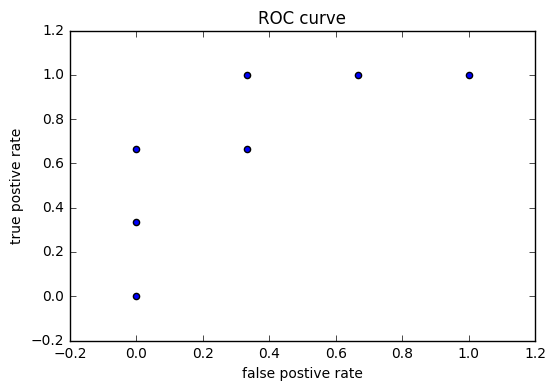

In [157]:
auc(np.array([-1, -1, -1, +1, +1, +1]), np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8]), plot=True)